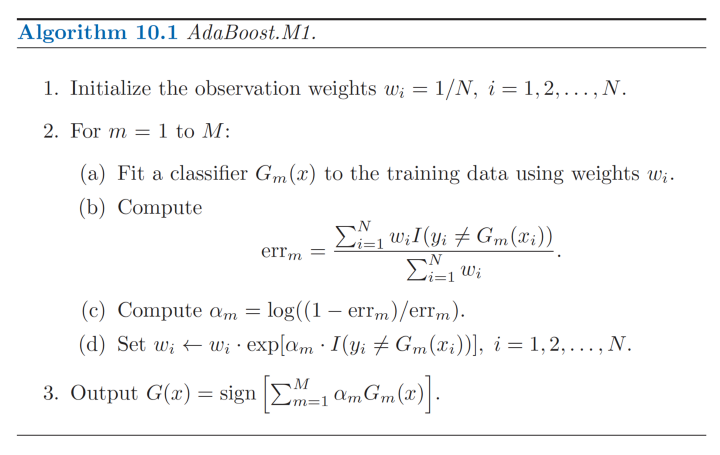

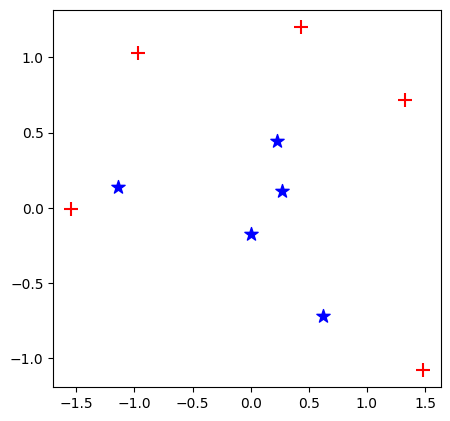

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

def make_toy_dataset(n: int = 100, random_seed: int = None):
    """ Generate a toy dataset for evaluating AdaBoost classifiers """
    n_per_class = int(n/2)
    if random_seed:
        np.random.seed(random_seed)
    X, y = make_gaussian_quantiles(n_samples=n, n_features=2, n_classes=2)    
    return X, y*2-1
X, y = make_toy_dataset(n=10, random_seed=10)
# Plot positive and negative samples
X_pos = np.count_nonzero(X[:, 0][y == 1])

ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], s=100, marker='+', color='red')

X_neg = np.count_nonzero(X[:, 0][y == 0])

ax.scatter(X[:, 0][y == -1], X[:, 1][y == -1], s=100, marker='*', color='blue')

In [ ]:
y.shape

(10,)

In [ ]:
round = 10
n = X.shape[0] # total no of data points
# Initialization
sample_weights = np.zeros((round, n)) # weights of samples, size = 10 x 10, iter x n
clfs = np.zeros(round, dtype = object) # total no of classifiers
print("clfs: ", clfs)
voting_powers = np.zeros(clfs.shape) # no of voting power equals to no of weak classifiers
print("voting_powers: ", voting_powers)
errors = np.zeros(round) # for each round we have errors
print("errors: ", errors)

# Round -1 all samples have equal weights
sample_weights[0] = 1/n
print(sample_weights)

clfs:  [0 0 0 0 0 0 0 0 0 0]
voting_powers:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
errors:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
for t in range (round):
  # fit  weak learner

  clf = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2) # clf represents the classifier
  current_sample_weights = sample_weights[t]
  clf = clf.fit(X,y,current_sample_weights)

  # calculate error and voting power from weak learner prediction
  clf_pred = clf.predict(X) # predict over all the dataset
  error = np.sum(current_sample_weights[clf_pred != y]) # error evaluated on misclassified data
  print(error)
  voting_power = 0.5*np.log((1-error)/error) # Calculate voting power
  print(voting_power)

  # update sample weights
  new_sample_weights = (
          current_sample_weights*np.exp(-(y*clf_pred*voting_power))
        )
  
  new_sample_weights /= sum(new_sample_weights) # normalize 
  print(new_sample_weights)

  # If not final iteration, update sample weights for t+1
  if t+1 < round:
      sample_weights[t+1] = new_sample_weights

  # save results of iteration
  clfs[t] = clf
  # clfs.append(clf)
  voting_powers[t] = voting_power
  errors[t] = error
  

0.2
0.6931471805599453
[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.25   0.0625 0.0625 0.25  ]
0.3125
0.39422868018213514
[0.1        0.04545455 0.04545455 0.1        0.1        0.1
 0.18181818 0.04545455 0.1        0.18181818]
0.2727272727272727
0.49041462650586315
[0.06875    0.08333333 0.08333333 0.06875    0.06875    0.06875
 0.33333333 0.03125    0.06875    0.125     ]
0.32291666666666663
0.37020003270524554
[0.05076923 0.12903226 0.12903226 0.05076923 0.05076923 0.05076923
 0.24615385 0.0483871  0.05076923 0.19354839]
0.2538461538461539
0.5391017085184512
[0.1        0.08646492 0.08646492 0.1        0.1        0.1
 0.16494845 0.03242434 0.1        0.12969737]
0.2946458264050549
0.43646300197980076
[0.07088637 0.06129184 0.06129184 0.07088637 0.07088637 0.07088637
 0.27990971 0.02298444 0.07088637 0.22009029]
0.35443187175860436
0.29980730089759633
[0.1        0.04747124 0.04747124 0.1        0.1        0.1
 0.21679331 0.01780172 0.1        0.17046248]
0.28320668702404594
0.464305

# Make Prediction
$H_t(x) = \text{sign} \Big( \sum_{t=1}^T \alpha_t h_t(x) \Big)$

In [ ]:
clf_preds = np.array([c.predict(X) for c in clfs])
# print(clf_preds)
Hx = np.sign(np.dot(voting_powers, clf_preds))
print(Hx)
print(y)

[-1.  1.  1. -1. -1. -1.  1.  1. -1.  1.]
[-1  1  1 -1 -1 -1  1  1 -1  1]


xx shape: (43, 51)


Text(0.5, 1.0, ' Implemented Adaboost Result')

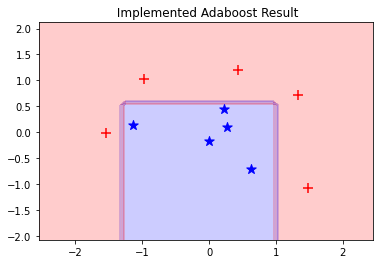

In [ ]:
x_min, x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
h = 0.1

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
print('xx shape:', xx.shape)
Xn = (np.c_[xx.ravel(), yy.ravel()])
preds = np.array([c.predict(Xn) for c in clfs])
Z = np.sign(np.dot(voting_powers, preds))
Z = Z.reshape(xx.shape)

# If all predictions are positive class, adjust color map acordingly
if list(np.unique(Z)) == [1]:
    fill_colors = ['r']
else:
    fill_colors = ['b', 'r']

plt.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)
# X_pos = None

# plt.scatter(None,None, s=100, marker='+', color='red')

# X_neg = None

# plt.scatter(None,None, s=100, marker='.', c='blue')

X_pos = np.count_nonzero(X[:, 0][y == 1])

plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], s=100, marker='+', color='red')

X_neg = np.count_nonzero(X[:, 0][y == 0])

plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], s=100, marker='*', color='blue')
plt.title(" Implemented Adaboost Result")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
bench = AdaBoostClassifier(n_estimators = 10).fit(X, y)

In [ ]:
train_err = (bench.predict(X) != y).mean()
print(f"Train error: {train_err:.1%}")

Train error: 0.0%


xx shape: (43, 51)


Text(0.5, 1.0, ' Implemented Adaboost Result')

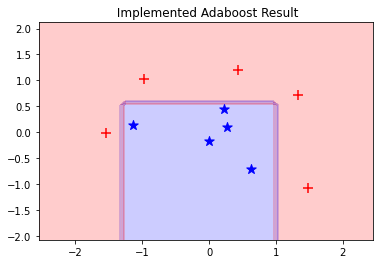

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
print('xx shape:', xx.shape)
Xn = (np.c_[xx.ravel(), yy.ravel()])
preds = bench.predict(Xn)
Z = preds.reshape(xx.shape)

# If all predictions are positive class, adjust color map acordingly
if list(np.unique(Z)) == [1]:
    fill_colors = ['r']
else:
    fill_colors = ['b', 'r']

plt.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)
# X_pos = None

# plt.scatter(None,None, s=100, marker='+', color='red')

# X_neg = None

# plt.scatter(None,None, s=100, marker='.', c='blue')

X_pos = np.count_nonzero(X[:, 0][y == 1])

plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], s=100, marker='+', color='red')

X_neg = np.count_nonzero(X[:, 0][y == 0])

plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], s=100, marker='*', color='blue')
plt.title(" Implemented Adaboost Result")